# Pymaceuticals Inc.
---

### Analysis

* The Bar graph describes that there are 10 treatments in the study. There are maximum number of mice tested for Drug Regimen Capomulin (230) and the drug  Propriva has less mice tested for study(148). The study focused more towards Capomulin drug treatment compared to the other treatments.

* Pie chart shows the study for the gender of mice. There are more male mice(958) than the female mice(922) however there is only 2.0% diffrence  between gender. The gender doesn't seem to be the main varible for the study.

* Box plot between 4 drug regimn shows the distribution of the final tumor volume for all the mice in each treatment group. Capomulin and Ramicane have lower number of final tumor volume than the other drug regimen. Number of mice treated with Ramicane is slightly less than the Capomulin so for the accurate study and comparision, both treatment should continue with the same number of mice.

* Line plot study with an example of one Mouse ID number l509 with Capomulin drug regimen shows tumor volume decreases when the time passed.

* Scattered plot provides the data of average tumor volume vs. mouse weight for Capomulin treatment. The correlation between mouse weight and avaerage tumor is 0.84 which is strong positive correlation, when the mouse weight increases the average tumor volume also increases.









In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata_studyresults = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
# Display the data table for preview
mousedata_studyresults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [80]:
# Checking the number of mice.
total_mice = len(mousedata_studyresults["Mouse ID"].unique())
total_mice

249

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

miceID_count = mousedata_studyresults["Mouse ID"].unique()
#miceID_count

duplicte_miceID = mousedata_studyresults.loc[mousedata_studyresults.duplicated(subset = ["Mouse ID", "Timepoint"]),
                                        "Mouse ID"].unique()
duplicte_miceID


array(['g989'], dtype=object)

In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicte_miceID_df = mousedata_studyresults.loc[mousedata_studyresults["Mouse ID"] == "g989", :]
duplicte_miceID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mice_studyresults_df = pd.DataFrame(mousedata_studyresults).drop_duplicates(subset = ["Mouse ID", "Timepoint"])

clean_mice_studyresults_df = pd.DataFrame(mousedata_studyresults).drop(duplicte_miceID_df.index)
clean_mice_studyresults_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [84]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mice_studyresults_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics
    From now use the Clean dataframe, "clean_mice_studyresults_df" for further calculations 
    
    Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each
    regimen


In [85]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mice_studyresults_df['Tumor Volume (mm3)'].groupby(clean_mice_studyresults_df['Drug Regimen']).mean()
median = clean_mice_studyresults_df['Tumor Volume (mm3)'].groupby(clean_mice_studyresults_df['Drug Regimen']).median()
var = clean_mice_studyresults_df['Tumor Volume (mm3)'].groupby(clean_mice_studyresults_df['Drug Regimen']).var()
std = clean_mice_studyresults_df['Tumor Volume (mm3)'].groupby(clean_mice_studyresults_df['Drug Regimen']).std()
sem = clean_mice_studyresults_df['Tumor Volume (mm3)'].groupby(clean_mice_studyresults_df['Drug Regimen']).sem()

sumamry_statistics_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table which has grouped by 'Drug Regimen' column
sumamry_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat_agg = clean_mice_studyresults_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [87]:
# First calculate number of mice tested for each drug
mice_count = clean_mice_studyresults_df["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

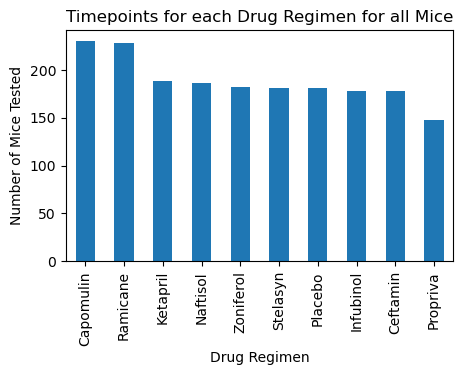

<Figure size 640x480 with 0 Axes>

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create a Pandas bar plot based off of the group series from before and label the title
timepoint_plot = mice_count.plot(kind="bar", figsize = (5,3))

# Set the xlabel, ylabel, and title using class methods
timepoint_plot.set_xlabel("Drug Regimen")
timepoint_plot.set_ylabel("Number of Mice Tested")
timepoint_plot.set_title("Timepoints for each Drug Regimen for all Mice")
plt.show()
plt.tight_layout()

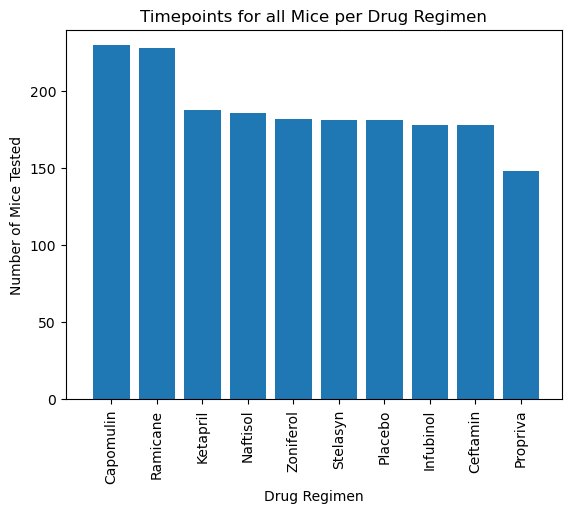

<Figure size 640x480 with 0 Axes>

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, align="center")
    
plt.title("Timepoints for all Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('Number of Mice Tested')

plt.xlim(-1, len(mice_count)-.10)
plt.ylim(0, max(mice_count) +10)


plt.xticks(rotation = "vertical")
plt.show()
plt.tight_layout()


In [90]:
# First find out total number of male and female mice:
sex_data = clean_mice_studyresults_df["Sex"].value_counts()
sex_data

Male      958
Female    922
Name: Sex, dtype: int64

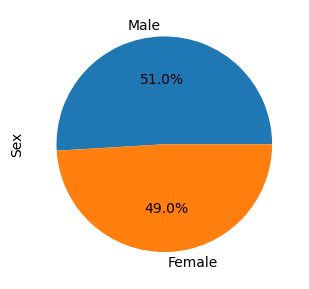

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot = sex_data.plot.pie(y="Sex", figsize=(3.5,3.5), autopct="%1.1f%%")
plt.show()

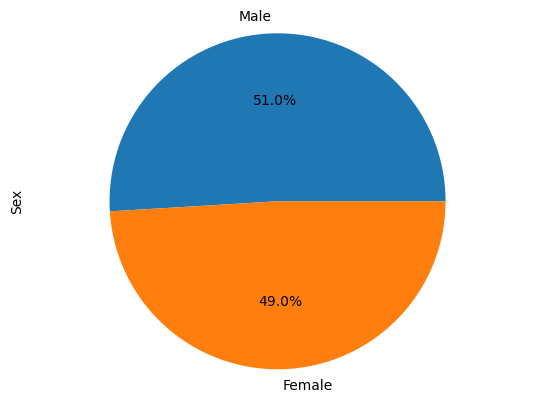

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_data.index
plt.pie(sex_data, labels=labels, autopct="%1.1f%%", radius=1)
plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create Dataframes for each drugs:
capomulin_df = clean_mice_studyresults_df.loc[clean_mice_studyresults_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_mice_studyresults_df.loc[clean_mice_studyresults_df["Drug Regimen"] == "Ramicane"]
Infubinol_df = clean_mice_studyresults_df.loc[clean_mice_studyresults_df["Drug Regimen"] == "Infubinol"]
Ceftamin_df = clean_mice_studyresults_df.loc[clean_mice_studyresults_df["Drug Regimen"] == "Ceftamin"]

# Combine the created dataframes in to one dataframe
drugs_df = [capomulin_df, Ramicane_df, Infubinol_df ,Ceftamin_df]
alldrugs_df = pd.concat(drugs_df)
#alldrugs_df

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_mice_studyresults_df.groupby("Mouse ID")
max_time = max_time["Timepoint"].max()
max_time_df = pd.DataFrame(max_time)
#max_time_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df =pd.merge(max_time_df, clean_mice_studyresults_df, on = ["Mouse ID", "Timepoint"])
tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in treatment_list :
    vol = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    #tumor_vol
    
    # IQR 
    quartiles = vol.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    iqr = Q3-Q1
    #print(iqr)  
     
    # Determine outliers using upper and lower bounds
    lowerbound = Q1 - (1.5 * iqr)
    upperbound = Q3 + (1.5 * iqr)
    outliers = vol.loc[(vol > upperbound) | (vol < lowerbound)]
   # if len(outliers) > 0 :
    print(f"{drug}'s potential outliers: {outliers}.")
        

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


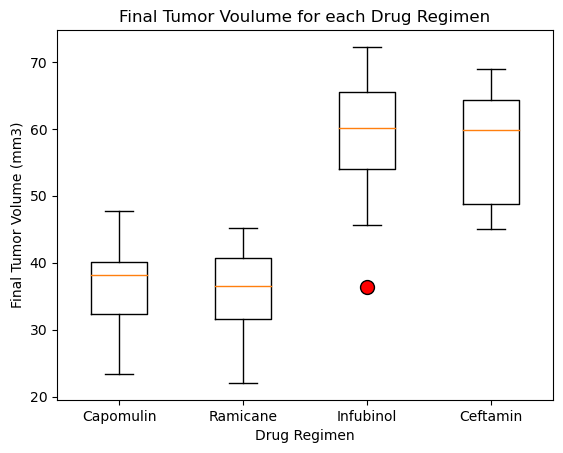

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatment_list, flierprops={'markerfacecolor':'r','markersize': 10})
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Voulume for each Drug Regimen")
plt.show()


## Line and Scatter Plots
    - Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    - Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

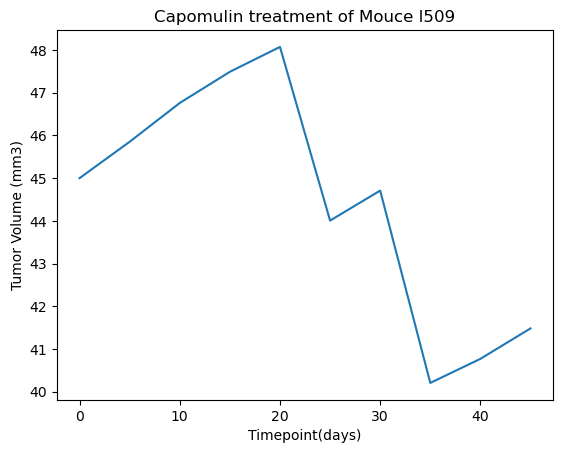

In [96]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin:

#Identify mouse ID l509 from the list and get data of the l509 mouse ID
Mouse_ID = "l509"
Mouse_ID_df= capomulin_df.loc[capomulin_df["Mouse ID"]== Mouse_ID]

#Create Line Plot
time_vol = plt.plot(Mouse_ID_df["Timepoint"], Mouse_ID_df["Tumor Volume (mm3)"])

#set Xlabel, ylabel and title
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of Mouce {Mouse_ID}")

plt.show()


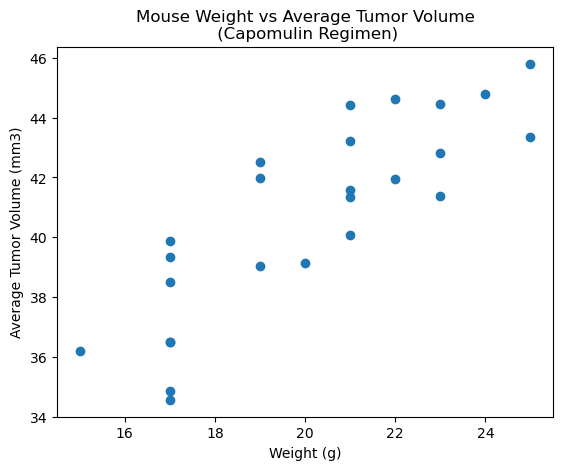

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# To get the vales, group by Mouse ID
capo_mouse_data = capomulin_df.groupby("Mouse ID")

# Create a variable that holds the column data
m_weight = capo_mouse_data["Weight (g)"].mean()
m_tumorvoulme = capo_mouse_data["Tumor Volume (mm3)"].mean()

# Set the values for x and y
x = m_weight
y = m_tumorvoulme

# Generate Scatter Plot
plt.scatter(x, y)

# Set xlabel, ylabel and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume\n (Capomulin Regimen)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


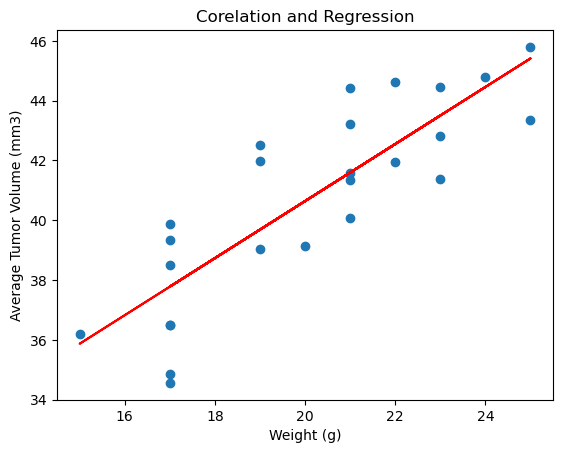

In [100]:
# Calculate the correlation coefficient and linear regression model
# Set x_axis and y_axis
x_values = m_weight
y_values = m_tumorvoulme

# Calculate linear regreesion (got the calculation from week-5, day-3 activities- 8,9)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values,y_values)

# Set xlabel, ylabel and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Corelation and Regression")

# Line plot
plt.plot(x_values,regress_values,"r-")

# print correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")